Tom Halloin <br> Springboard Data Science Career Track <br>

<h1 align="center">Capstone Project 2: Analysis of Berkshire Hathaway Shareholder Letters Using Natural Language Processing (NLP) Techniques</h1>

<h3 align='center'> Part 4: Summarizing the Letters</h3> <br>

<h3>This notebook will try to provide a summary of the annual letters and visualize the findings in a wordcloud.</h3>

In [1]:
# Credit the following Medium article for this idea
# https://medium.com/@ondenyi.eric/extractive-text-summarization-techniques-with-sumy-3d3b127a0a32

In [2]:
#Plain text parsers since we are parsing through text
from sumy.parsers.plaintext import PlaintextParser

#for tokenization and summaries
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer

# For garbage collection to speed up loops
import gc 

In [3]:
# Part 1: LexRank

# Storing the summaries as a list
lexrank = []
for year in range(1977, 2019):
    file = f'clean_letters/{year}_letter.txt' 
    parser = PlaintextParser.from_file(file, Tokenizer('english'))
    summarizer = LexRankSummarizer()
    #Summarize the document with sentences
    summary = summarizer(parser.document, 5)
    sentences=[]
    for sentence in summary:
        gc.disable()
        sentences.append(str(sentence))
        gc.enable()
    lexrank.append(sentences)

In [4]:
# Part 2: TextRank

textrank = [] 
for year in range(1977, 2019):
    file = f'clean_letters/{year}_letter.txt' 
    parser = PlaintextParser.from_file(file, Tokenizer('english'))
    summarizer = TextRankSummarizer()
    #Summarize the document with sentences
    summary = summarizer(parser.document, 5) 
    sentences=[]
    for sentence in summary:
        gc.disable()
        sentences.append(str(sentence))
        gc.enable()
    textrank.append(sentences)  

In [5]:
# Part 3: LSA

lsa = []
for year in range(1977, 2019):
    file = f'clean_letters/{year}_letter.txt' 
    parser = PlaintextParser.from_file(file, Tokenizer('english'))
    summarizer = LsaSummarizer()
    #Summarize the document with sentences
    summary = summarizer(parser.document, 5)
    sentences=[]
    for sentence in summary:
        gc.disable()
        sentences.append(str(sentence))
        gc.enable()
    lsa.append(sentences)    

In [6]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [7]:

# Create a doc out of the yearly summaries

similarity_ab = []
similarity_bc = []
similarity_ac = []
for summary in range(42):
    nlp_lexrank = nlp(str(lexrank[summary][0:4]))
    nlp_textrank = nlp(str(textrank[summary][0:4]))
    nlp_lsa = nlp(str(lsa[summary][0:4]))
    gc.disable()
    similarity_ab.append(nlp_lexrank.similarity(nlp_textrank))
    similarity_ac.append(nlp_lexrank.similarity(nlp_lsa))
    similarity_bc.append(nlp_textrank.similarity(nlp_lsa))
    gc.enable()
# Get a similarity between all three of the different summary techniques. (A -> B) (B -> C) (A -> C)
# Plot these three lines on a line chart using year as the X-axis and similarity as the Y-axis

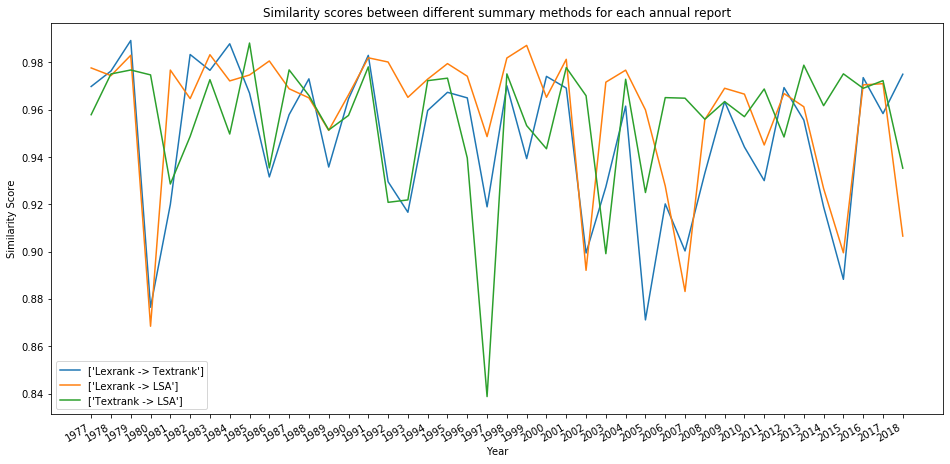

In [14]:
import matplotlib.pyplot as plt

# If the graph does not appear, try running the cell again.

f, ax = plt.subplots(figsize=(16, 8))
plt.plot(similarity_ab)
plt.plot(similarity_ac)
plt.plot(similarity_bc)
plt.legend([['Lexrank -> Textrank'], ['Lexrank -> LSA'], ['Textrank -> LSA']])

ax.set_title('Similarity scores between different summary methods for each annual report')
ax.set_xticks([x for x in range(42)])
ax.set_xticklabels([str(x) for x in range(1977, 2019)])
ax.set_ylabel('Similarity Score')
ax.set_xlabel('Year')

f.autofmt_xdate()

plt.show()

In [9]:
lexrank[20]

['Even though they are going to be net buyers of stocks formany years to come, they are elated when stock prices rise and depressedwhen they fall.',
 'Now assume that the dice will be thrown once a year; that you, the&quot;bond-buyer,&quot; agree to pay $50 million if a 12 appears; and thatfor &quot;insuring&quot; this risk you take in an annual &quot;premium&quot;of $1 million.',
 '&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; At GEICO, we are paying in a waythat makes sense for both our owners and our managers.',
 '12/31/97        Shares  Company                      Cost      Market                                                (dollars in millions)    49,456,900  American Express Company     $1,392.7   $  4,414.0   200,000,000  The Coca-Cola Company         1,298.9     13,337.5    21,563,414  The Walt Disney Company         381.2      2,134.8    63,977,600  Freddie Mac                     329.4      2,683.1    48,000,000  The Gillette Company            600.0      4,821.0    23,733,198  Tr

In [10]:
textrank[20]

['&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Here are the growth rates of thetwo segments by decade:                                                Pre-tax Earnings Per Share                          Investments          Excluding All Income from  Decade Ending            Per Share                  Investments              1977                   24.6%                       27.6%      1987                   26.5%                       24.1%      1997                   25.5%                       20.8% Annual Growth  Rate, 1967-1997            25.6%                       24.2%&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; During 1997, both parts of ourbusiness grew at a satisfactory rate, with investments increasing by $9,543per share, or 33.5%, and operating earnings growing by $296.43 per share,or 70.3%.',
 '&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Below are the new business andin-force figures for the last five years:                       New Voluntary      Voluntary Auto      Years           Auto Polic

In [11]:
lsa[20]

['Whenever we buy into an industry whose leading participants arentknown to me, I always ask our new partners, &quot;Are there any more athome like you?&quot; Upon our purchase of Nebraska Furniture Mart in 1983,therefore, the Blumkin family told me about three outstanding furnitureretailers in other parts of the country.',
 'As was thecase with the Blumkins and Bill Child, I had no need to check leases, workout employment contracts, etc.',
 'That other possibility   synergygains   is usually unrealistic, since we expect acquirees to operate afterweve bought them just as they did before.',
 'Coke continues to increase itsmarket dominance throughout the world, but, tragically, it has lost theleader responsible for its outstanding performance.',
 'After his death, I read every one of themore than 100 letters and notes he had written me during the past nineyears.']